In [1]:
import pandas as pd
from scipy.io import loadmat

# Load the MATLAB file
#mat_data = loadmat('assets/data/1 - Three Baseline Conditions/baseline_3.mat')
mat_data = loadmat('assets/data/2 - Three Outer Race Fault Conditions/OuterRaceFault_3.mat')

# Explore the keys in the .mat file
#print(mat_data.keys())

bearing_data = mat_data['bearing']

array([[array([[ 0.718744 ],
               [ 0.4493211],
               [-0.975775 ],
               ...,
               [ 0.907281 ],
               [ 2.090778 ],
               [ 1.042275 ]])]], dtype=object)

In [13]:
# Extract individual components
main_data = bearing_data["gs"][0,0]   # The main signal data (array)
sampling_rate = bearing_data["sr"] 
rate = bearing_data["rate"] 
load = bearing_data["load"] 

# Inspect the main data and metadata
print("Main Data:", main_data)
print("Abtastrate:", sampling_rate) # x s[samples]ps, 6 seconds
print("Eingangswellenrate:", rate) # x Hz
print("Ausgeübte Last:", load) # x lbs (= pounds)

Main Data: [[ 0.718744 ]
 [ 0.4493211]
 [-0.975775 ]
 ...
 [ 0.907281 ]
 [ 2.090778 ]
 [ 1.042275 ]]
Abtastrate: [[array([[97656]], dtype=int32)]]
Eingangswellenrate: [[array([[25]], dtype=uint8)]]
Ausgeübte Last: [[array([[270]], dtype=uint16)]]


In [14]:
# Convert the main data to a DataFrame
df = pd.DataFrame(main_data, columns=['Signal'])
df

,Signal
0,0.718744
1,0.449321
2,-0.975775
3,-0.629232
4,-0.841568
...,...
585931,-1.098783
585932,-0.367623
585933,0.907281
585934,2.090778


In [15]:
df.min()

Signal   -6.171905
dtype: float64

In [16]:
df.max()

Signal    5.56443
dtype: float64

<Axes: >

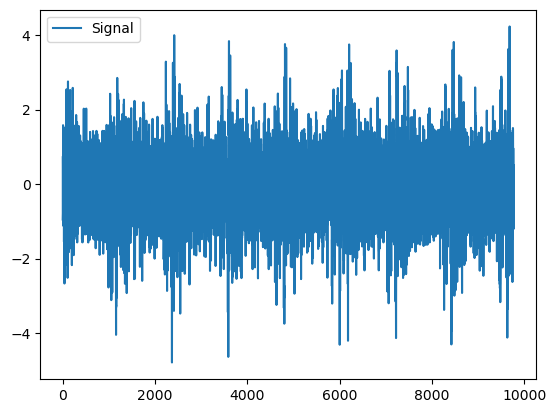

In [19]:
df.loc[:9766].plot()

In [54]:
bearing_content[0]

array([[25]], dtype=uint8)

In [55]:
bearing_content[1]

array([[270]], dtype=uint16)

In [56]:
bearing_content[2]

array([[ 1.301891 ],
       [-0.6672074],
       [-0.4034944],
       ...,
       [ 0.2698536],
       [-0.3131699],
       [ 0.3153727]])

In [57]:
bearing_content[3]

array([[97656]], dtype=int32)

In [80]:
# Extract a structured array (example for MATLAB table)
structured_data = mat_data['bearing']
# Convert the structured array to a dictionary
table_dict = {key: structured_data[key][0, 0] for key in structured_data.dtype.fields}

In [81]:
table_dict

{'rate': array([[25]], dtype=uint8),
 'load': array([[270]], dtype=uint16),
 'gs': array([[ 0.718744 ],
        [ 0.4493211],
        [-0.975775 ],
        ...,
        [ 0.907281 ],
        [ 2.090778 ],
        [ 1.042275 ]]),
 'sr': array([[97656]], dtype=int32)}

In [84]:
table_dict["gs"]

array([[ 0.718744 ],
       [ 0.4493211],
       [-0.975775 ],
       ...,
       [ 0.907281 ],
       [ 2.090778 ],
       [ 1.042275 ]])